In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

## Obesity Levels

In [2]:
# Cargamos el dataset (ajusta la ruta si es necesario)

df = pd.read_csv("Obesity_Levels/ObesityDataSet.csv")

# Revisamos las primeras filas del dataset
display(df.head())
print("Valores faltantes: ", df.isna().sum().sum())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Valores faltantes:  0


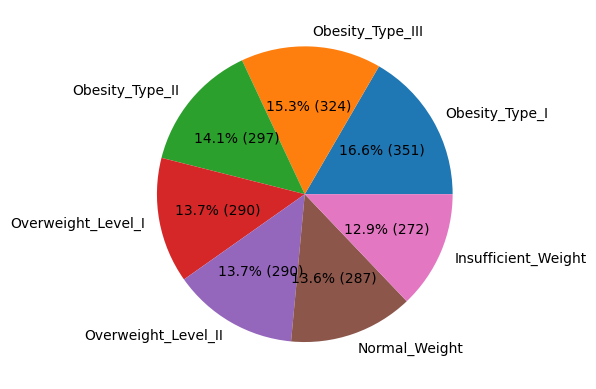

In [3]:
plt.pie(df['NObeyesdad'].value_counts().values,
        labels=df['NObeyesdad'].value_counts().index,
        autopct=lambda p: f'{p:.1f}% ({int(round(p * sum(df["NObeyesdad"].value_counts()) / 100))})')
plt.show()

In [4]:
# Codificación de las variables categóricas
le = LabelEncoder()
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


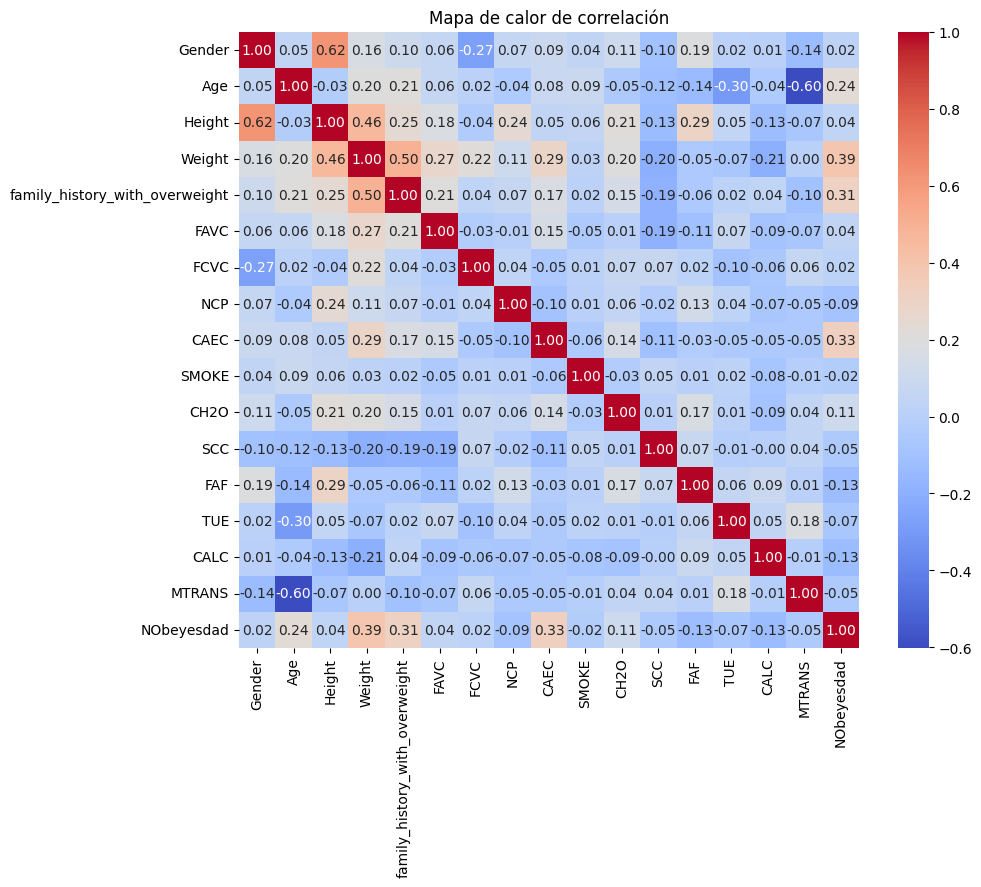

In [5]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlación")
plt.show()

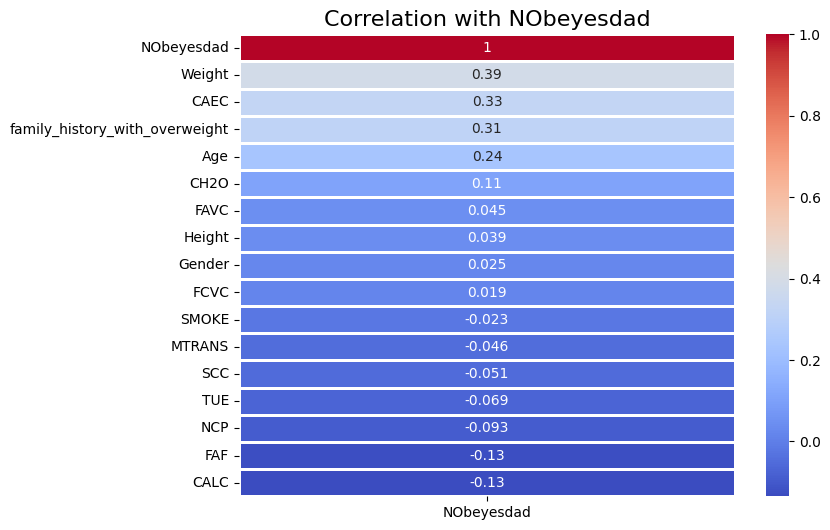

In [6]:
correlation = df.corr()['NObeyesdad'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, linecolor='white')

plt.title('Correlation with NObeyesdad', fontsize=16)
plt.show()

In [21]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.375000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


## Bone Marrow Transplant

In [7]:
dataRff = arff.loadarff('Bone_Marrow_Transplant/bone-marrow.arff')
df = pd.DataFrame(dataRff[0])
df.survival_status = df.survival_status.astype(int)

df.drop(columns='survival_time', inplace=True)

# Decodificar las columnas binarias o categóricas que están en bytes
for column in df.select_dtypes([object]).columns:
    # Convertir las columnas de bytes a strings (y opcionalmente a enteros si son 0/1)
    df[column] = df[column].str.decode('utf-8')  # Para texto

for i in range(len(df)):
    for col in df:
        if df[col].dtype == np.dtype('object'):
            if df.at[i, col] == '?':
                df.at[i, col] = np.nan
        else:
            if pd.isna(df.loc[i, col]):
                df.at[i, col] = np.nan

display(df)

print("Datos faltantes: ", df.isna().sum().sum())

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,0,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,0
1,1,0,23.342466,0,1,0,-1,-1,1,0,...,1,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,1
2,1,0,26.394521,0,1,0,-1,-1,1,0,...,1,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,1
3,0,0,39.684932,1,1,0,1,2,1,1,...,0,NaN,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,1
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,1,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1,0,0,...,0,1,11.08,2.522750,4.39,44.0,15.0,22.0,16.0,1
183,0,1,22.895890,0,0,0,1,0,1,1,...,1,1,4.64,1.038858,4.47,44.5,12.0,30.0,1000000.0,1
184,0,1,27.347945,0,1,0,1,-1,1,1,...,1,1,7.73,1.635559,4.73,33.0,16.0,16.0,1000000.0,0
185,1,1,27.780822,0,1,0,1,0,1,1,...,0,0,15.41,8.077770,1.91,24.0,13.0,14.0,54.0,1


Datos faltantes:  81


In [8]:
cat_col=[col for col in df.columns if df[col].dtype =='object'] # categoric
num_col=[col for col in df.columns if df[col].dtype !='object'] # numeric

print(80*"*","numeric")
for col in num_col:
    print(f"{col}: {df[col].unique()}")
    
print(80*"*","catogoric")
for col in cat_col:
    print(f"{col}: {df[col].unique()}")

******************************************************************************** numeric
Donorage: [22.830137 23.342466 26.394521 39.684932 33.358904 27.391781 34.520548
 21.435616 32.641096 28.783562 29.731507 36.8      40.863014 30.60274
 30.676712 41.164384 40.232877 40.821918 43.375342 31.745205 43.578082
 42.380822 31.545205 24.780822 30.50411  20.605479 40.969863 39.983562
 33.052055 39.172603 24.731507 24.353425 39.024658 23.446575 39.380822
 20.961644 49.860274 43.517808 40.536986 21.4      34.273973 20.471233
 44.380822 20.358904 31.526027 38.761644 28.805479 36.868493 29.772603
 28.821918 30.287671 33.120548 39.641096 39.632877 34.169863 31.194521
 30.389041 24.367123 37.287671 30.2      35.087671 29.161644 44.413699
 55.40274  43.715068 45.915068 22.643836 47.112329 26.221918 24.476712
 35.287671 31.671233 26.731507 39.643836 41.542466 42.268493 41.443836
 29.964384 21.263014 21.756164 29.980822 22.112329 37.       33.550685
 35.630137 40.052055 33.791781 32.372603 25.210959

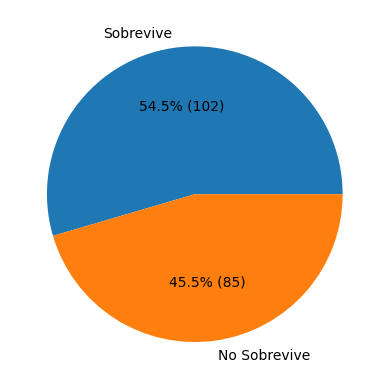

In [9]:
# Mapeo de los valores 0 y 1 a etiquetas más significativas
labels = df['survival_status'].value_counts().index.map({0: "Sobrevive", 1: "No Sobrevive"})



plt.pie(df['survival_status'].value_counts().values,
        labels=labels,
        autopct=lambda p: f'{p:.1f}% ({int(round(p * sum(df["survival_status"].value_counts()) / 100))})')
plt.show()

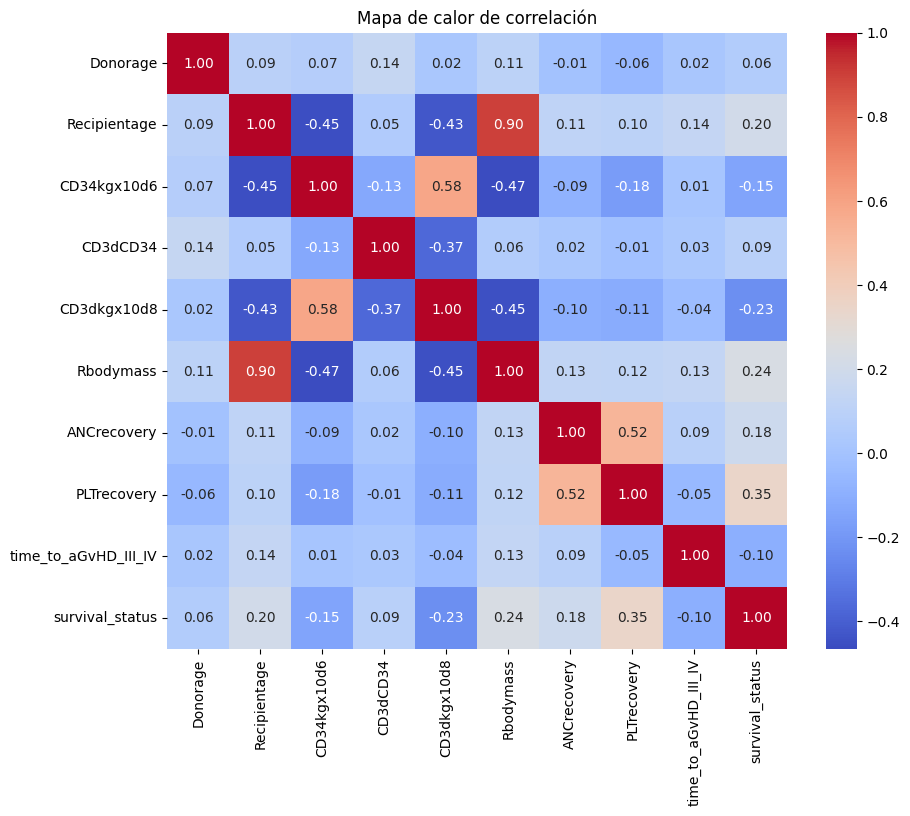

In [10]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlación")
plt.show()

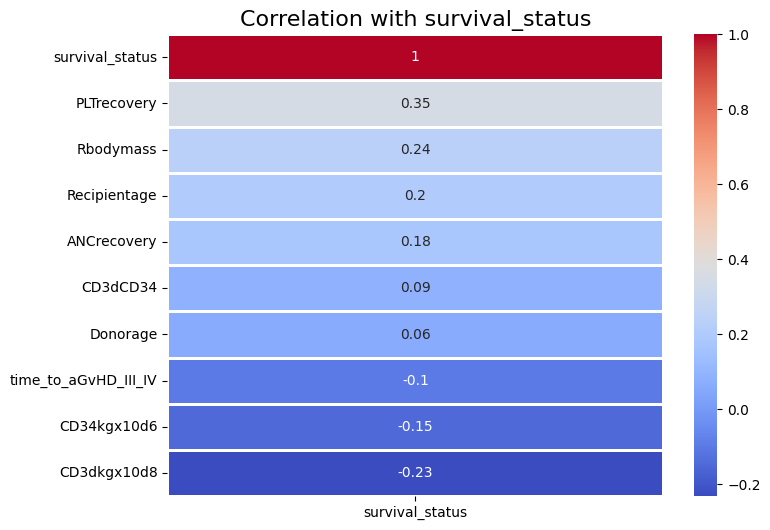

In [11]:
correlation = df.corr()['survival_status'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, linecolor='white')

plt.title('Correlation with survival_status', fontsize=16)
plt.show()

In [12]:
y = df.survival_status
df.drop(columns='survival_status', inplace=True)

## Chronic Kidney Disease

In [13]:
df = pd.read_csv('Chronic_Kidney_Disease/kidney_disease.csv')

print(df.shape)

df.drop(columns='id', inplace=True)

df = df.replace(r' ', '', regex=True)
df = df.replace(r'\t', '', regex=True)
for i in range(len(df)):
    for col in df:
        if df[col].dtype == np.dtype('object'):
            if df.at[i, col] == '?':
                df.at[i, col] = np.nan
        else:
            if pd.isna(df.loc[i, col]):
                df.at[i, col] = np.nan

display(df)
print("Datos faltantes: ",df.isna().sum().sum())
df.isna().sum()

(400, 26)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


Datos faltantes:  1012


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

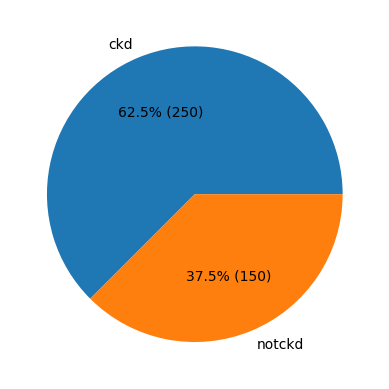

In [14]:
plt.pie(df['classification'].value_counts().values,
        labels=df['classification'].value_counts().index,
        autopct=lambda p: f'{p:.1f}% ({int(round(p * sum(df["classification"].value_counts()) / 100))})')
plt.show()

In [15]:
df['classification'] = df['classification'].map({'ckd': 0, 'notckd': 1})

cat_col=[col for col in df.columns if df[col].dtype =='object'] # categoric
num_col=[col for col in df.columns if df[col].dtype !='object'] # numeric

print(80*"*","numeric")
for col in num_col:
    print(f"{col}: {df[col].unique()}")
    
print(80*"*","catogoric")
for col in cat_col:
    print(f"{col}: {df[col].unique()}")

******************************************************************************** numeric
age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg: [1.02  1.01  1.005 1.015   nan 1.025]
al: [ 1.  4.  2.  3.  0. nan  5.]
su: [ 0.  3.  4.  1. nan  2.  5.]
bgr: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 

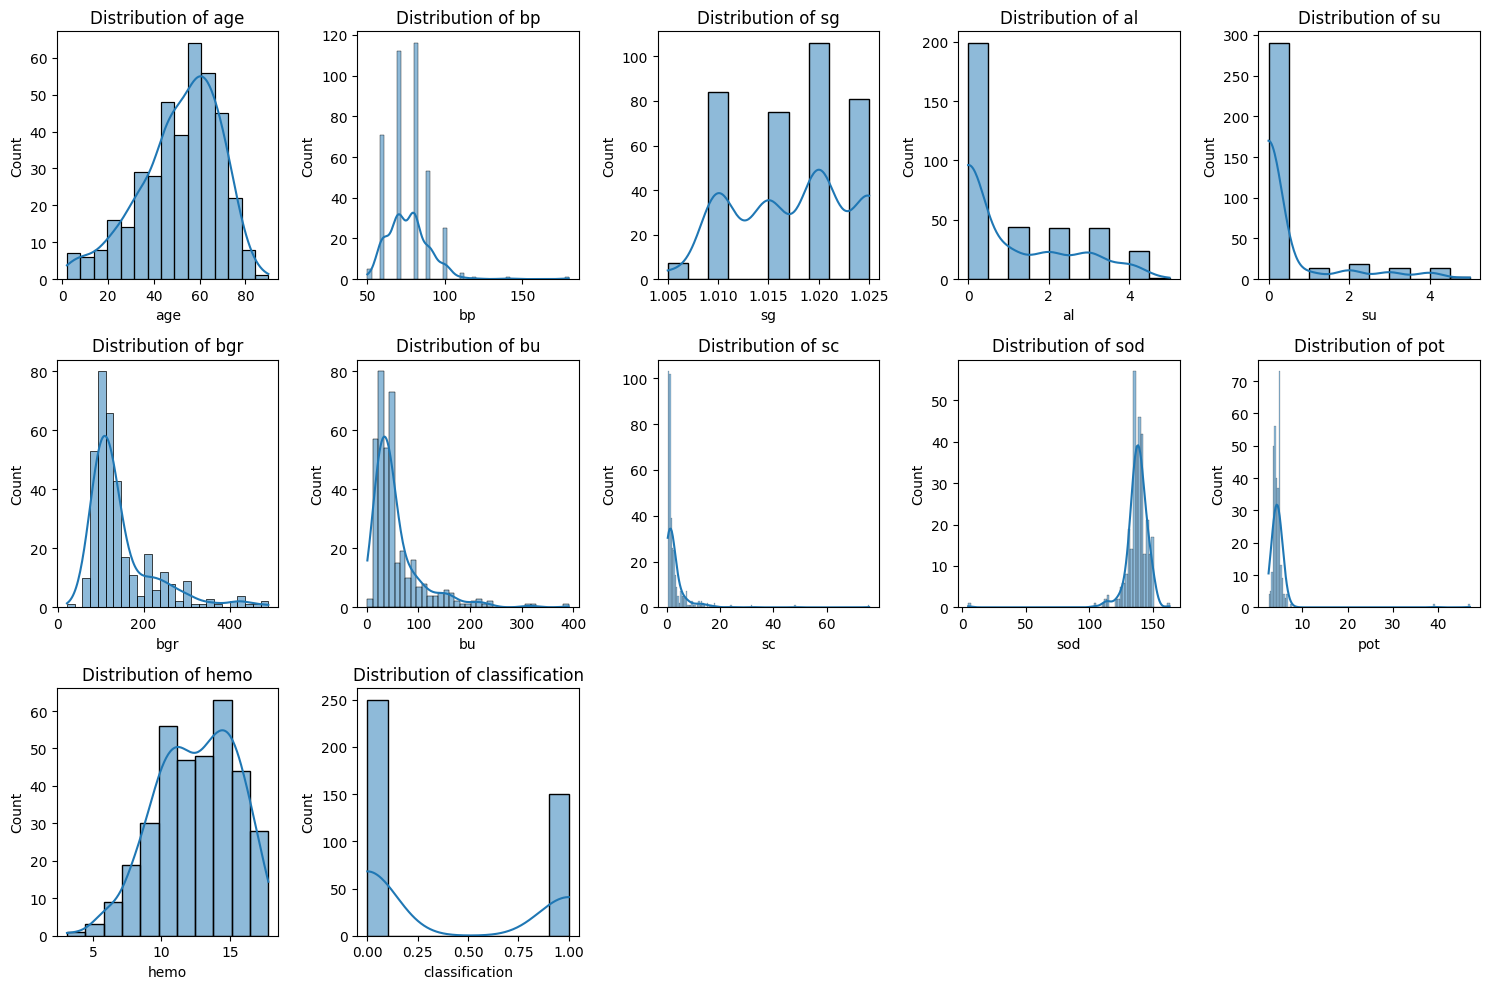

In [16]:
plt.figure(figsize=(15, 10))
plotnumber = 1

for col in num_col:
    if plotnumber <= 14:  
        ax = plt.subplot(3, 5, plotnumber)  
        sns.histplot(df[col], kde=True, ax=ax)  
        plt.xlabel(col)
        plt.title(f'Distribution of {col}')
    plotnumber += 1

plt.tight_layout()  
plt.show()

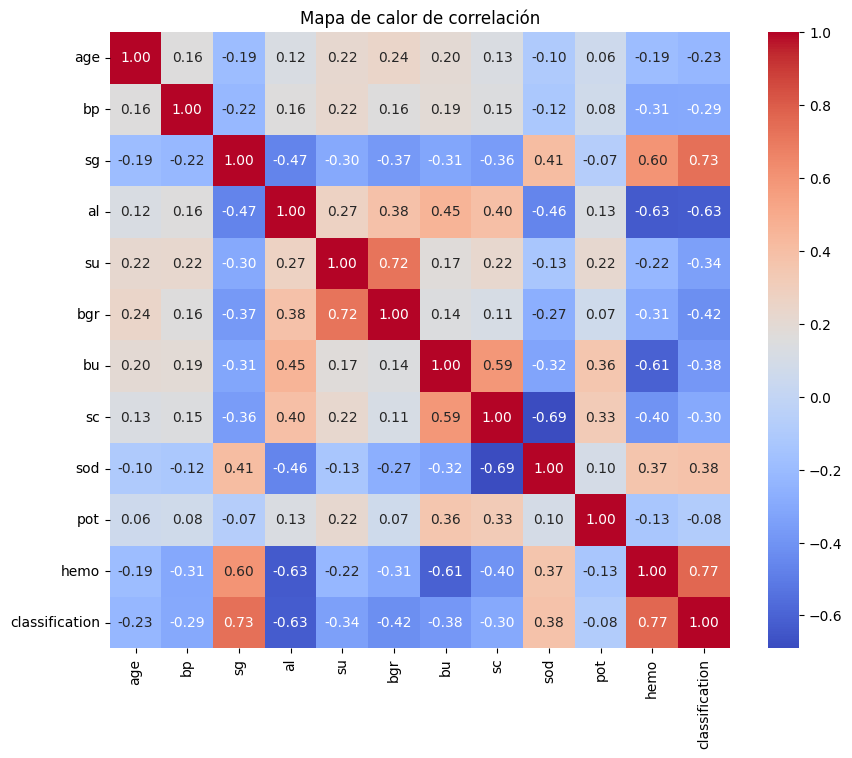

In [17]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlación")
plt.show()

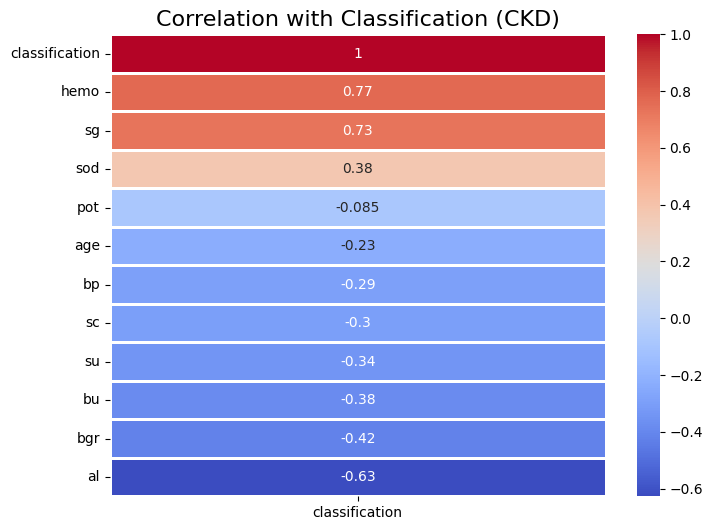

In [23]:
correlation = df.corr()['classification'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, linecolor='white')

plt.title('Correlation with Classification (CKD)', fontsize=16)
plt.show()

In [24]:
# Supongamos que `df` es tu DataFrame y `num_col` contiene las columnas numéricas
num_col = df.select_dtypes(include=['float64', 'int64']).columns  # Detectar columnas numéricas automáticamente

# Crear el imputador usando la media como estrategia (puedes cambiarla a 'median' o 'most_frequent')
imputer = SimpleImputer(strategy='mean')  # También puedes usar 'median' o 'most_frequent'

# Ajustar el imputador a las columnas numéricas y transformar los datos
df[num_col] = imputer.fit_transform(df[num_col])

# Verificar si aún hay valores faltantes
print(df[num_col].isna().sum())

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
classification    0
dtype: int64


In [25]:
def solve_mv_mode(feature):
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)
    
for col in cat_col:
    solve_mv_mode(col)
df[cat_col].isna().sum()

rbc      0
pc       0
pcc      0
ba       0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

## Diabetes 130-US Hospitals

In [26]:
df = pd.read_csv('Diabetes_130US/diabetic_data.csv')


print('Hay', len(df['patient_nbr'].unique()), 'pacientes únicos.')
print('Hay', len(df['encounter_id'].unique()), 'encuentros únicos.')


Hay 71518 pacientes únicos.
Hay 101766 encuentros únicos.


#### Cada vez que un paciente visita el hospital, se habla de un encuentro. Por lo tanto, tenemos varios encuentros por paciente.

In [27]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

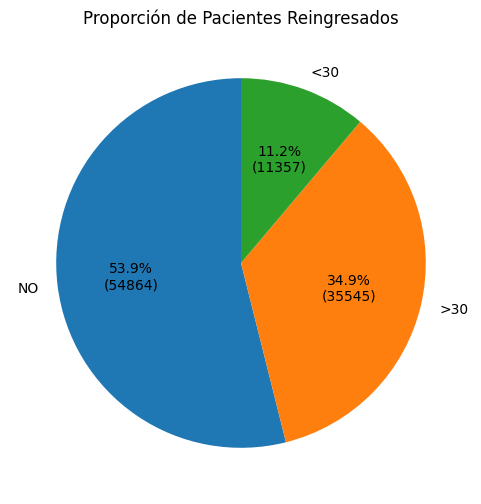

In [28]:
import matplotlib.pyplot as plt

# Función personalizada para mostrar porcentaje y cantidad
def autopct_format(pct, all_vals):
    total = sum(all_vals)
    count = int(round(pct * total / 100.0))  # Calcula la cantidad
    return f'{pct:.1f}%\n({count})'         # Formato: porcentaje + cantidad

# Datos de ejemplo
# Reemplaza 'df['readmitted'].value_counts()' con tus datos reales
sizes = df['readmitted'].value_counts()
labels = sizes.index

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90
)
plt.title('Proporción de Pacientes Reingresados')
plt.show()


Como aproximadamente el 50% de los datos pertenecen a la clase **"NO"**, y las demás clases tienen menos etiquetas, se creará un problema de desequilibrio de clases. Por lo tanto, consideraremos este problema como un problema de 2 clases. Solo intentaremos predecir si el paciente será readmitido o no. Omitiremos la parte de menos de 30 días o más de 30 días.

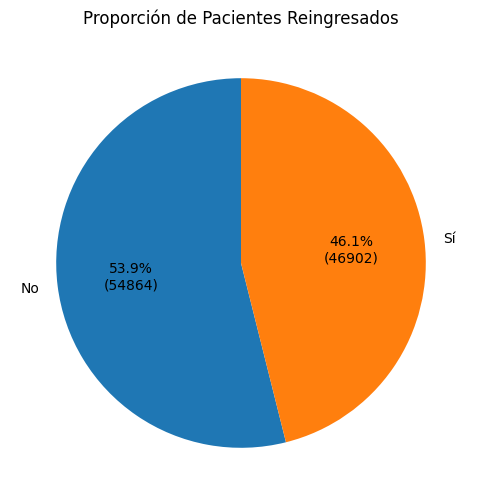

In [29]:
df['readmitted']=df['readmitted'].apply(lambda x : 'Sí' if x =='<30' or x == '>30' else 'No')

sizes = df['readmitted'].value_counts()
labels = sizes.index

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90
)
plt.title('Proporción de Pacientes Reingresados')
plt.show()

#### Columna Race
La característica "Race" define la raza del paciente. Según la documentación, los valores de raza pueden ser:
- Caucásico
- Asiático
- Afroamericano
- Hispano
- Otro


In [30]:
df['race'].value_counts(dropna=False)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

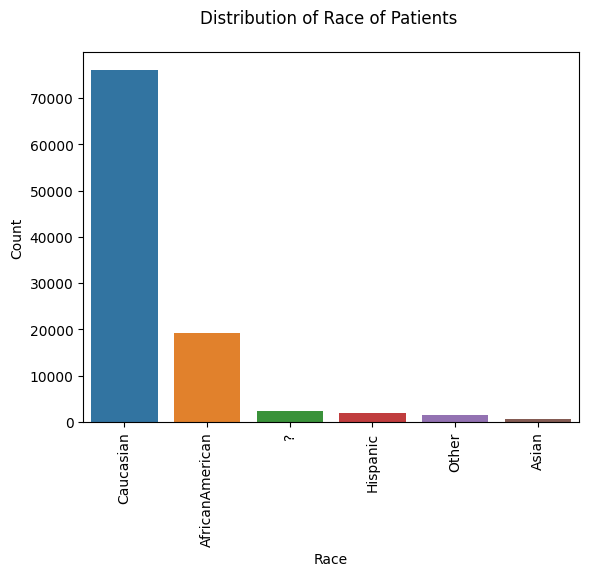

In [31]:
sns.barplot(x=df['race'].value_counts(dropna=False).index,   
                 y=df['race'].value_counts(dropna=False))
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Race of Patients \n')
plt.show()

+ La mayoría de las personas son caucásicas, es decir, personas con ascendencia europea.

+ En los datos hay un signo "?", lo que significa que la raza contiene valores nulos.

+ Tendremos que eliminar esto de los datos o también podemos asignarle la categoría "Otros".

In [32]:
df.loc[df['race'] == '?', 'race'] = 'Other'

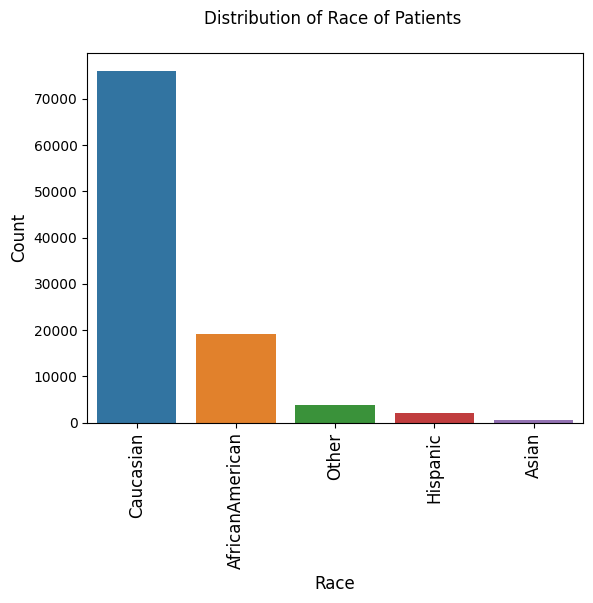

In [33]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

#### Columna Gender

In [34]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Aquí solo hay 3 encuentros de los que no conocemos el género, lo que puede generar un error de distribución en los datos.
Por lo tanto, es mejor eliminar estas filas de los datos.

In [35]:
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)

df.reset_index(inplace = True, drop = True)

#### Columnas weight, payer_code y medical_specialty
La mayoría de instancias de estas columnas están vacias por lo que las eliminamos


In [36]:
df.drop(columns = ['weight', 'payer_code', 'medical_specialty'], inplace = True)

#### 24 Features for Medications

For the generic names:

La función indica si el medicamento fue recetado o hubo un cambio en la dosis. Valores:

+ “up” si se aumentó la dosis durante el encuentro
+ “down” si se redujo la dosis
+ “steady” si la dosis no cambió
+ “no” si no se recetó el medicamente

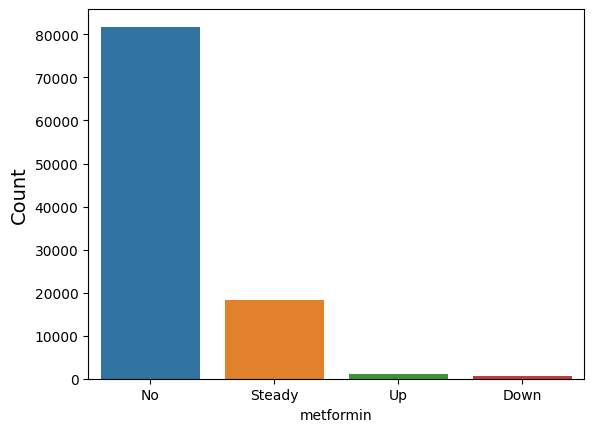

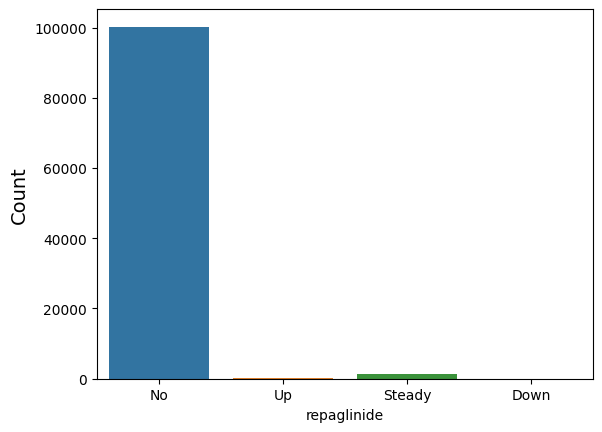

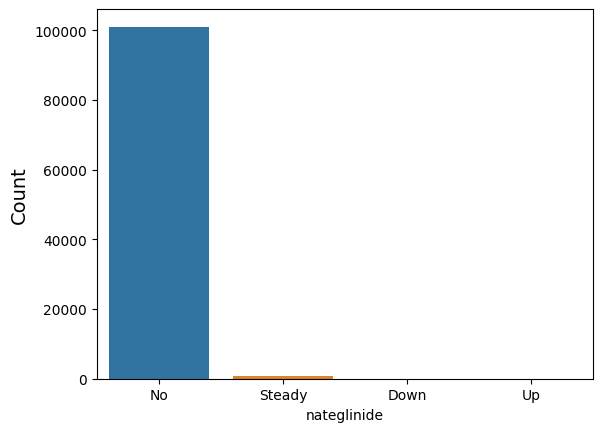

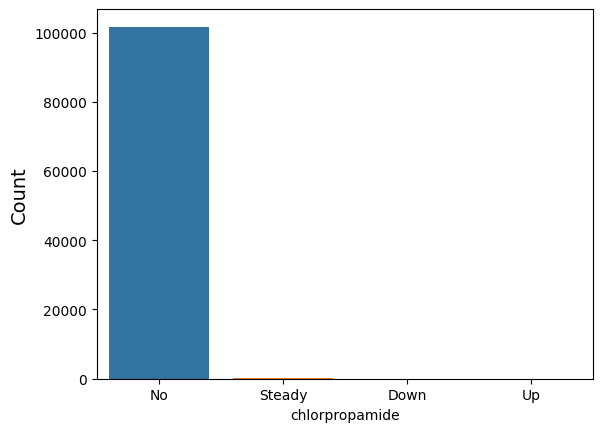

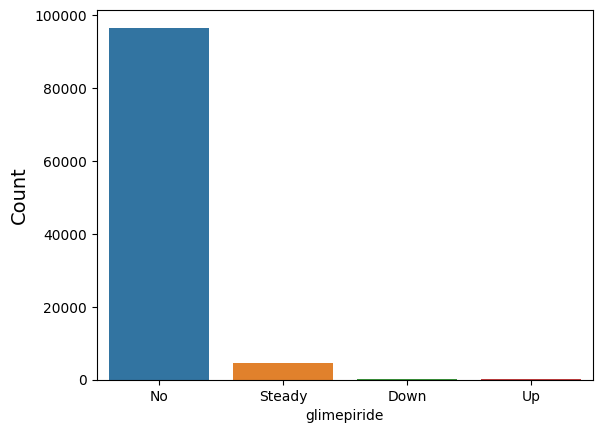

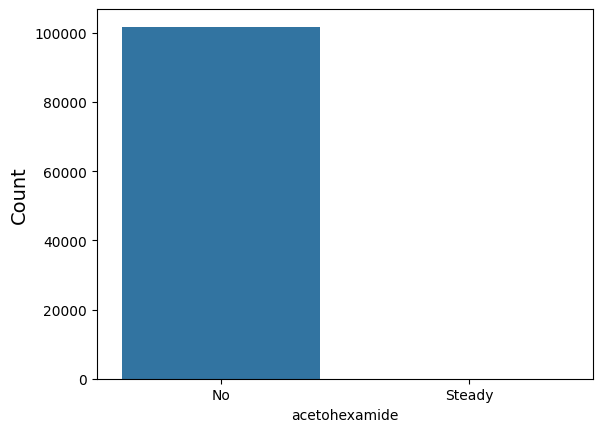

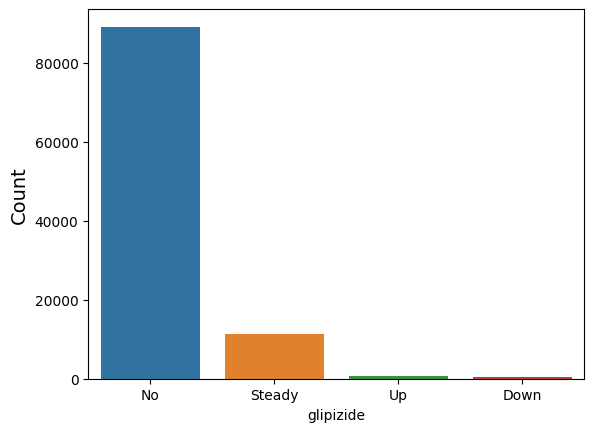

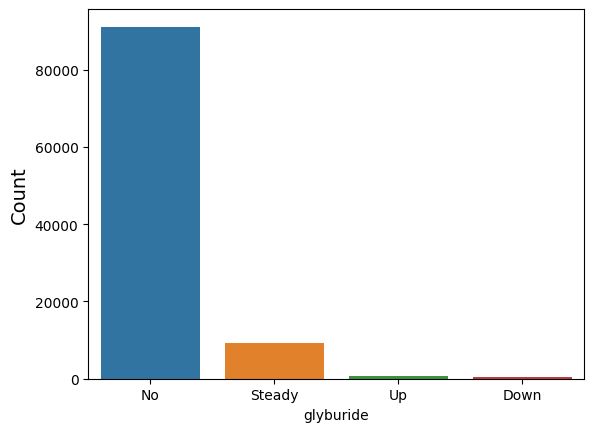

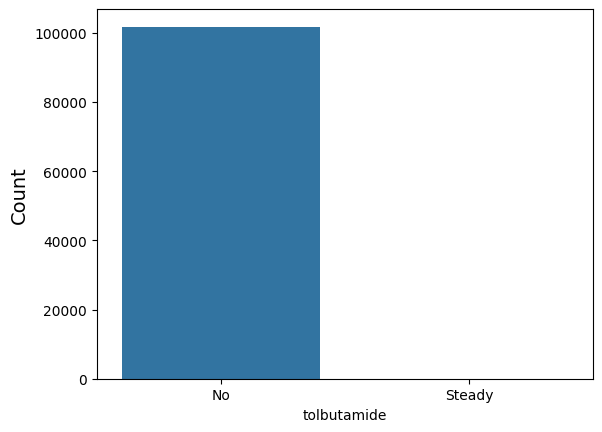

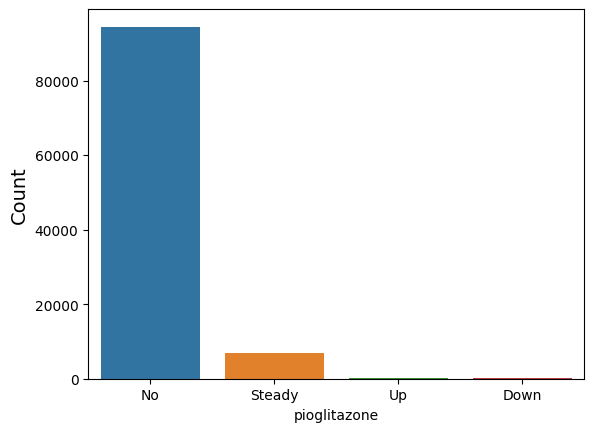

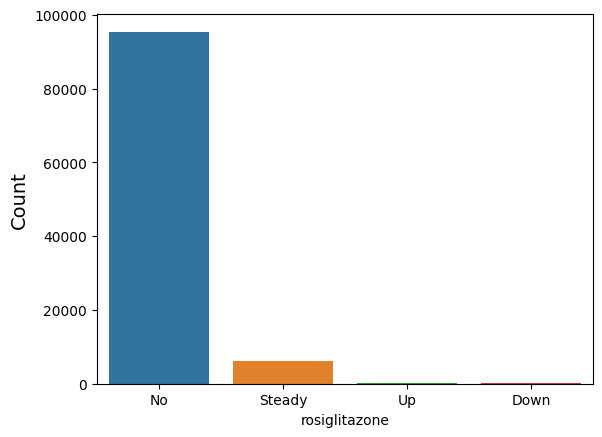

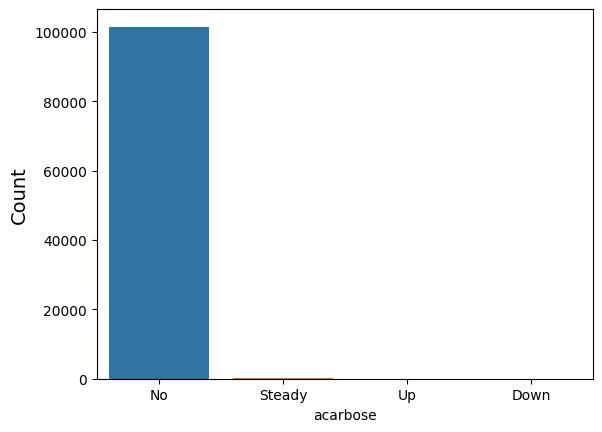

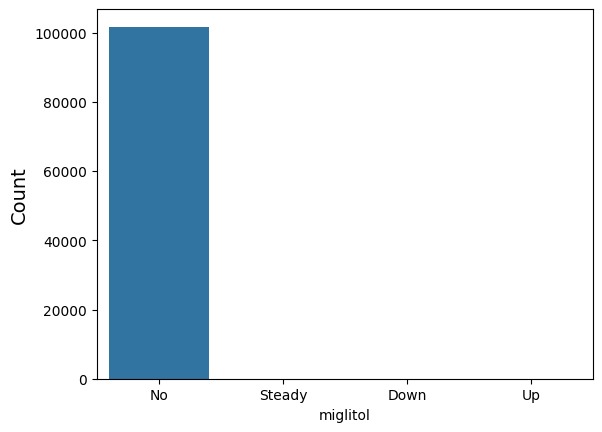

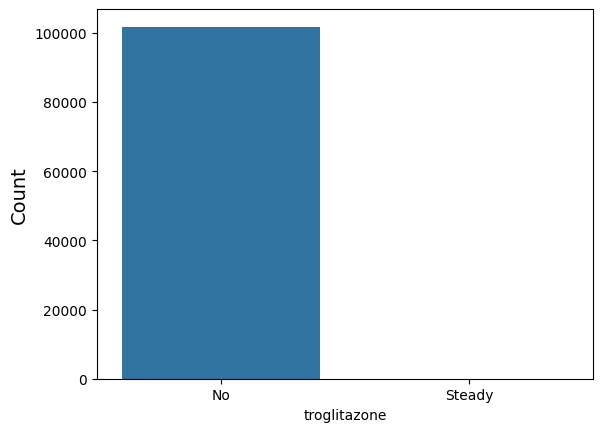

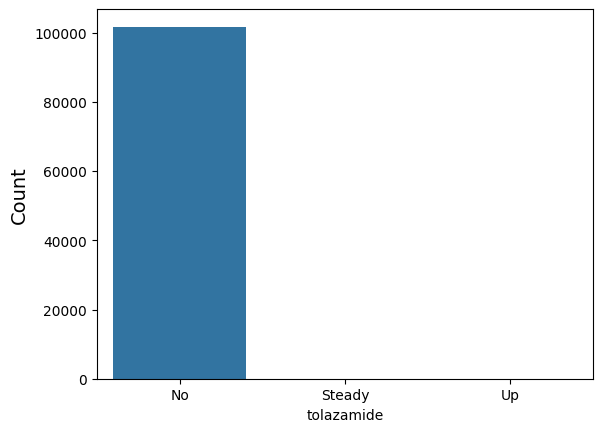

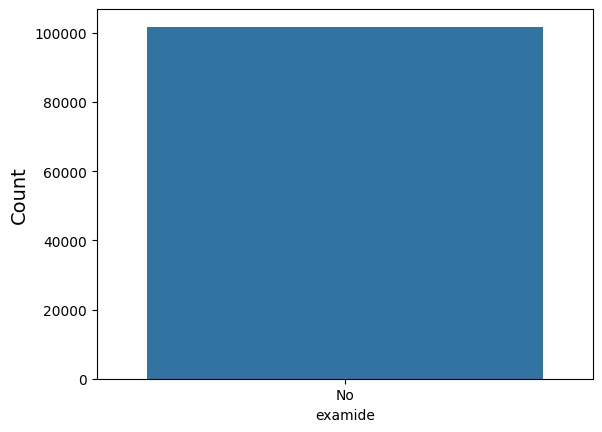

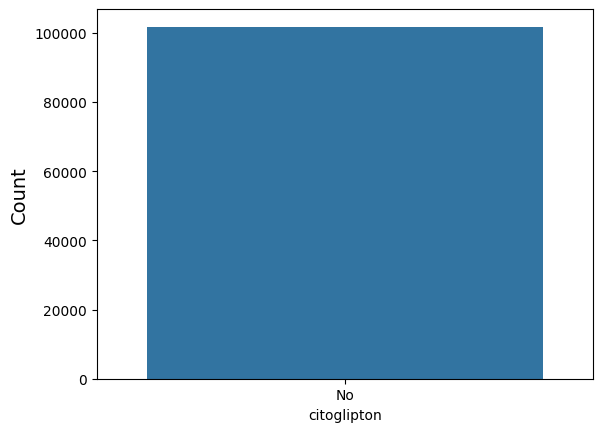

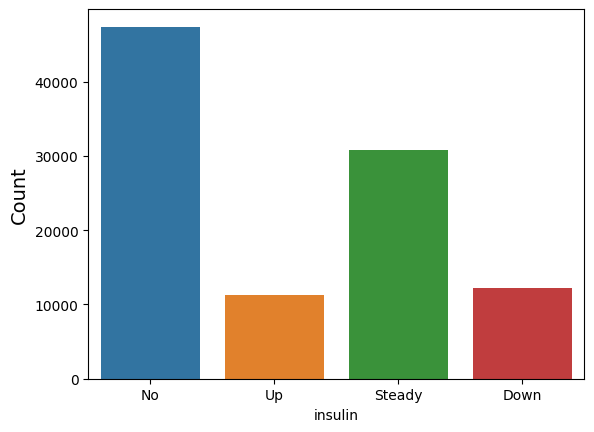

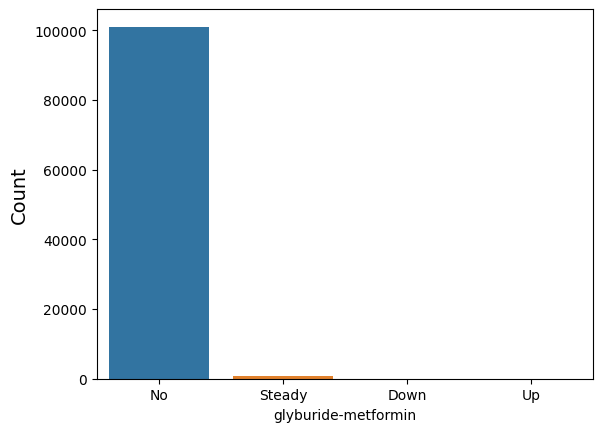

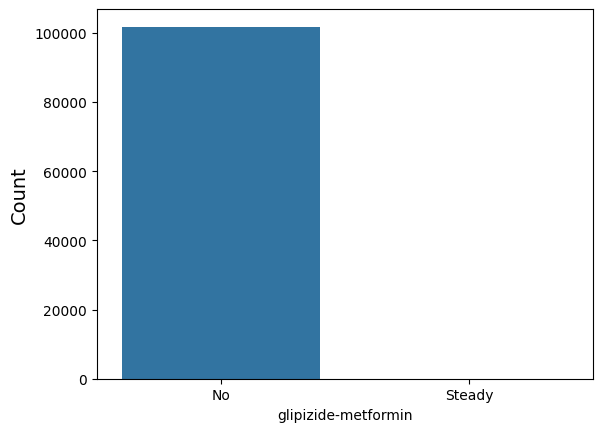

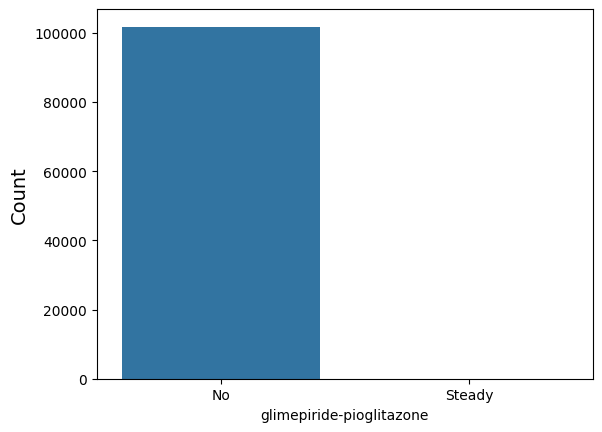

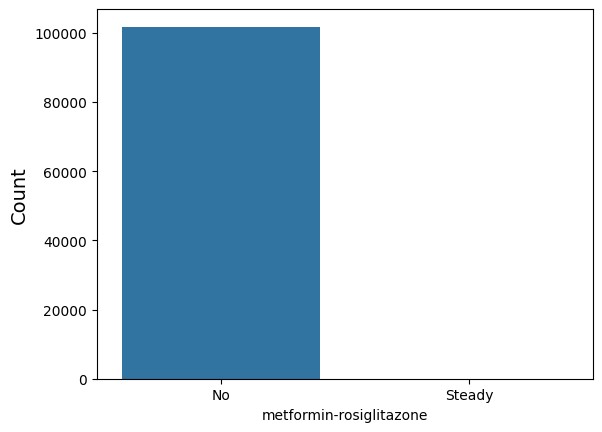

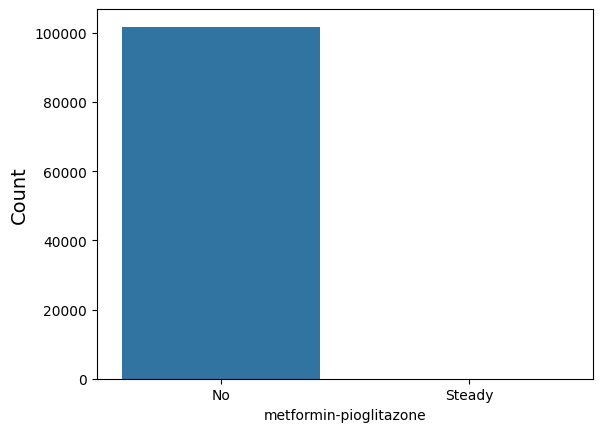

In [37]:
for i in df.iloc[:, 21:44].columns:

    ax = sns.countplot(x=i, data= df)
#     plt.xticks(rotation=90, size = 12)
    plt.ylabel('Count', size = 14)
    plt.show()

De los gráficos de recuento anteriores, podemos ver que la mayoría de los medicamentos no están asignados a los pacientes. Si se asigna uno, se asigna a muy pocas personas.

#### Analizamos los medicamentos con la variable de clase Readmisión

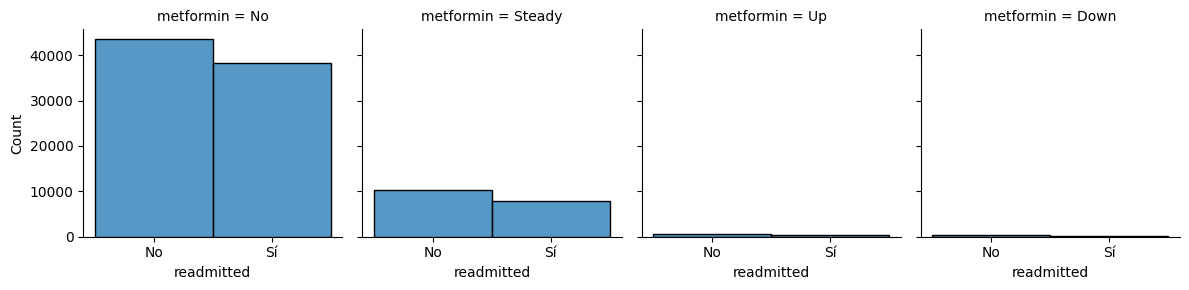

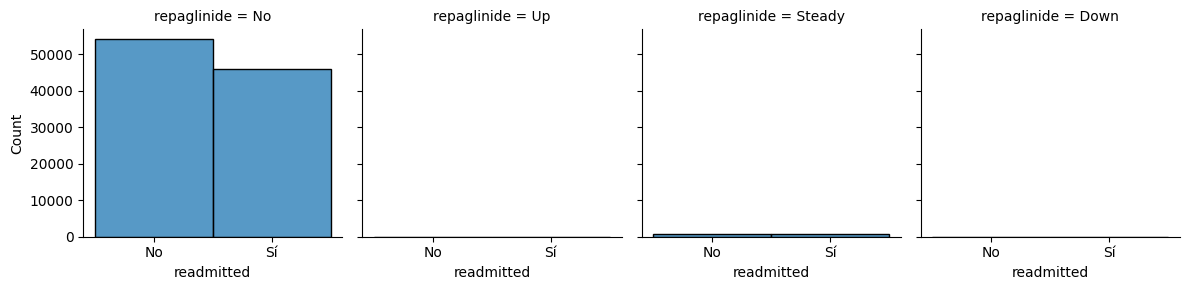

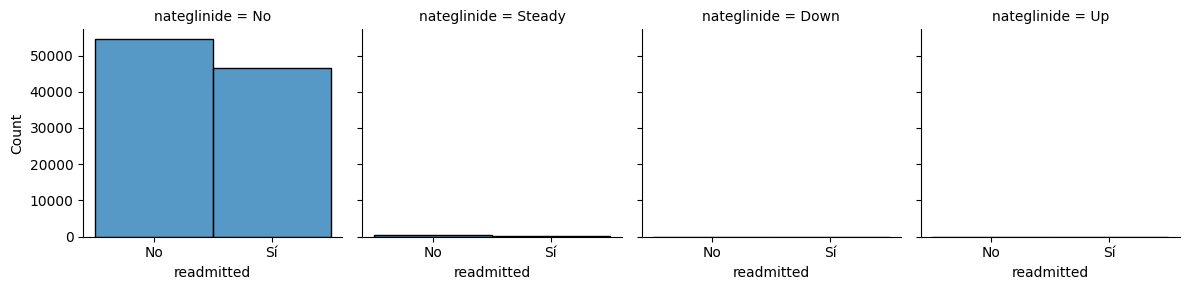

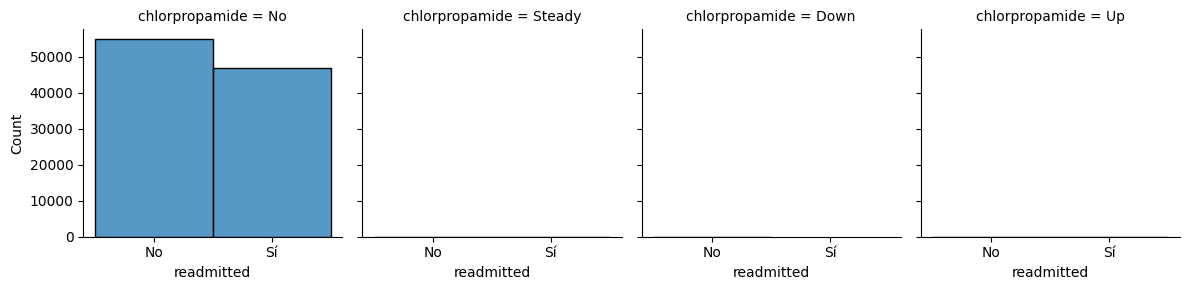

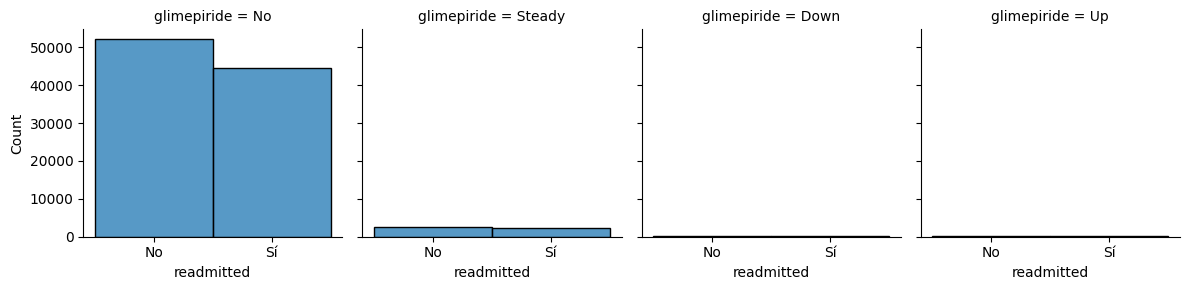

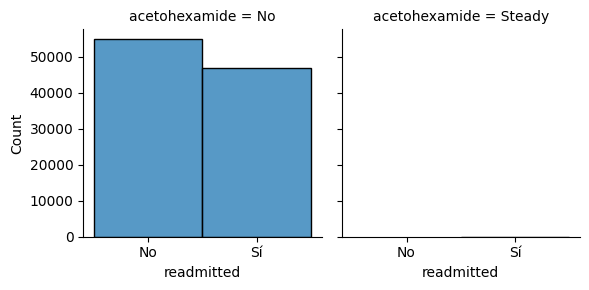

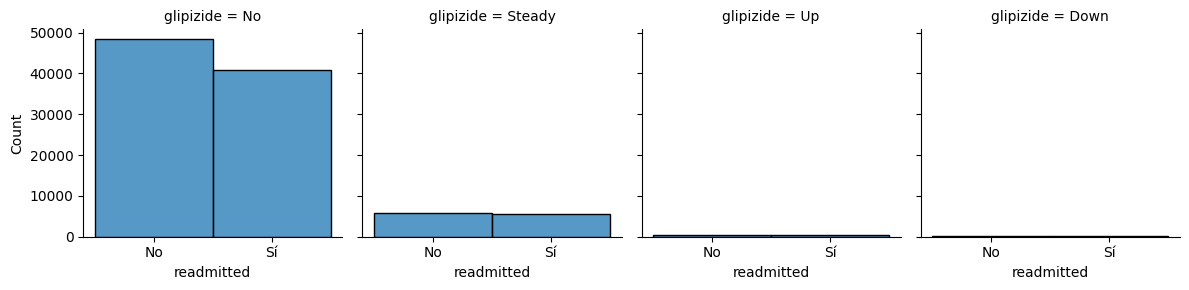

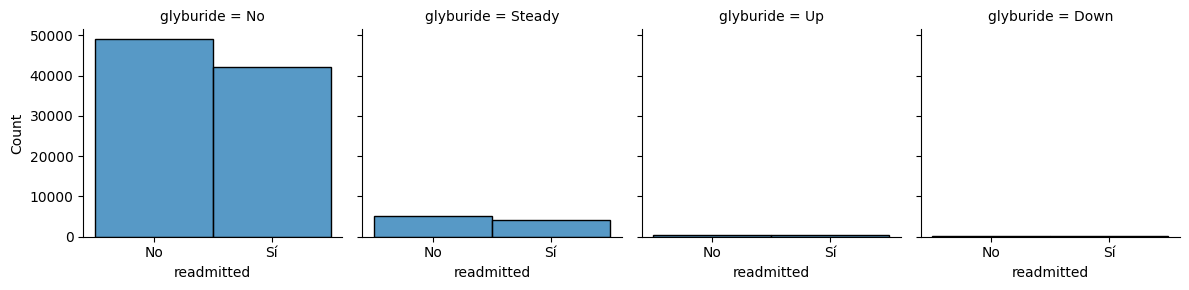

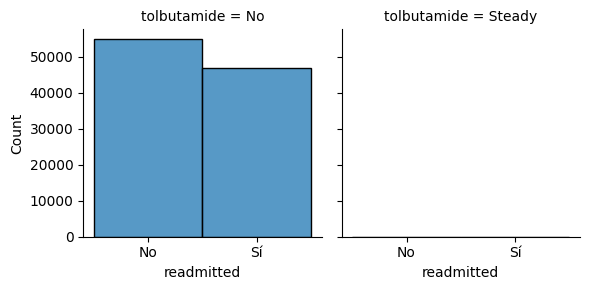

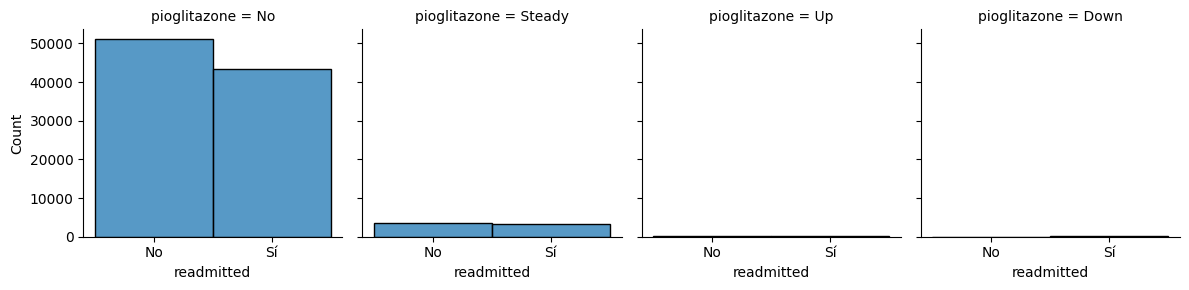

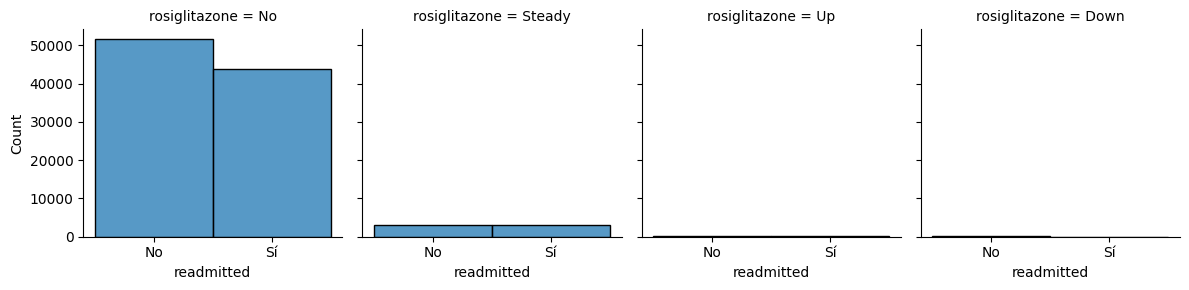

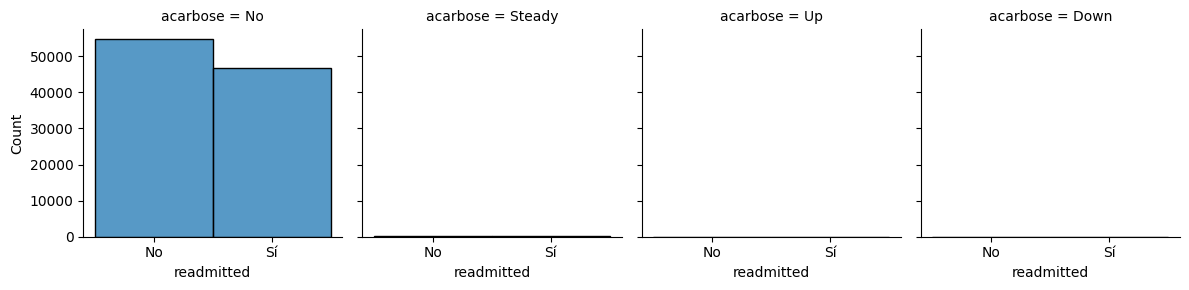

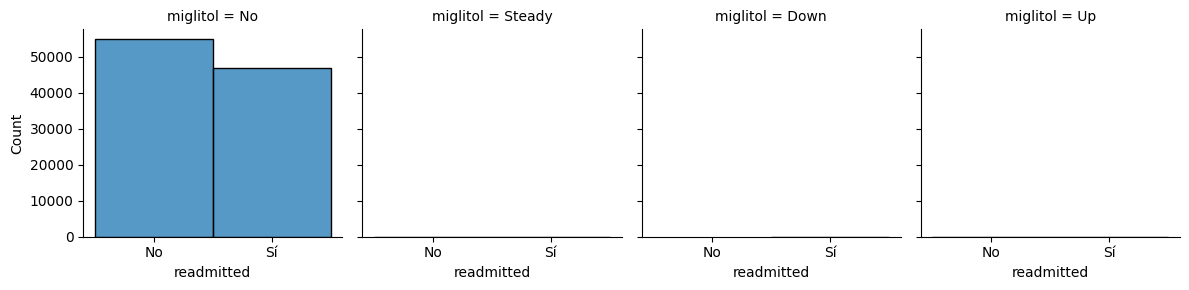

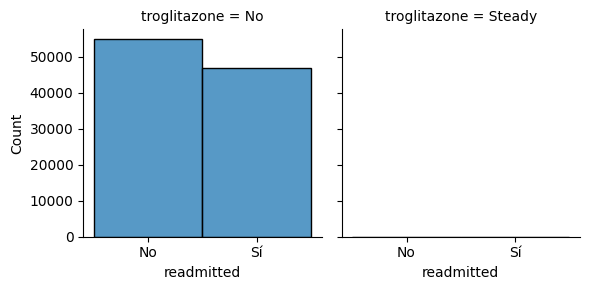

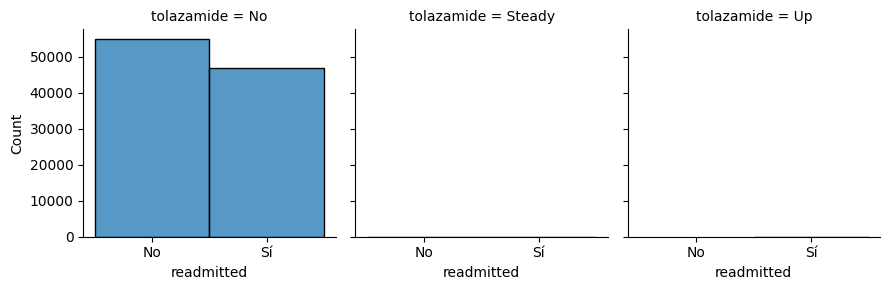

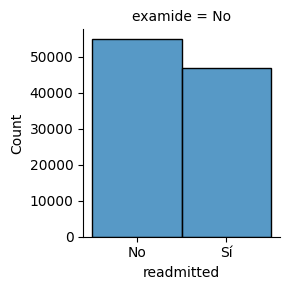

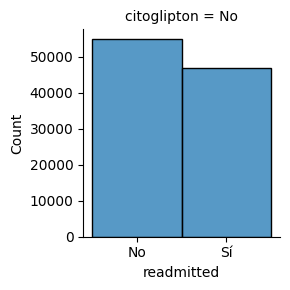

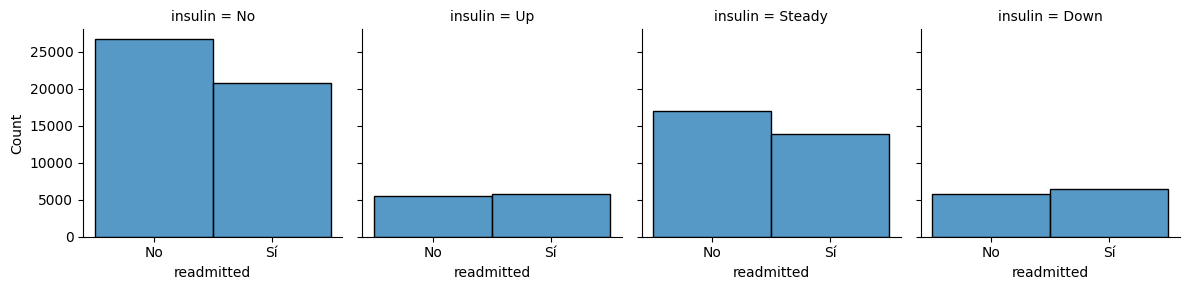

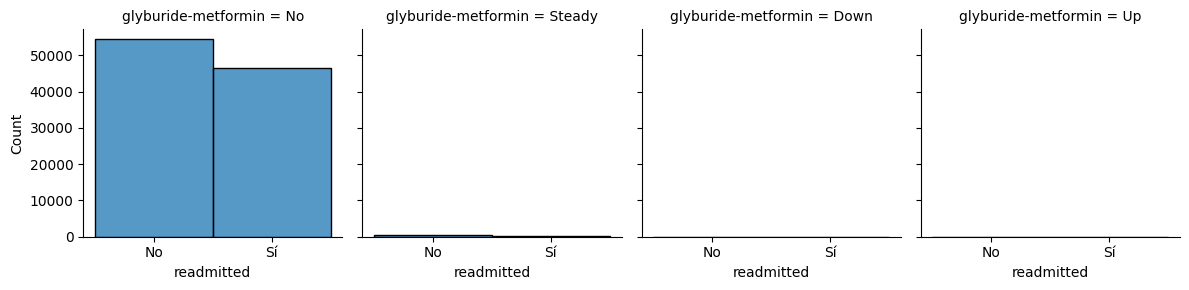

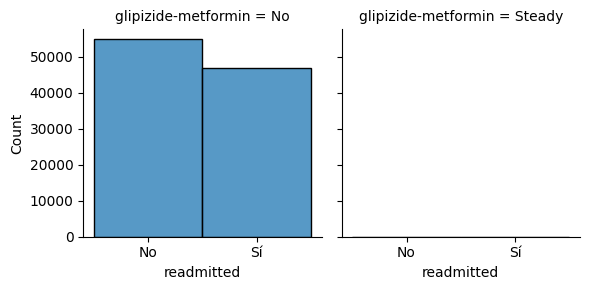

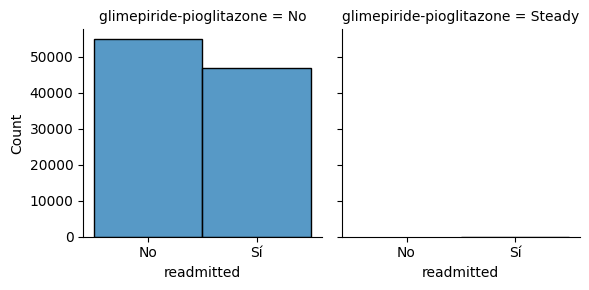

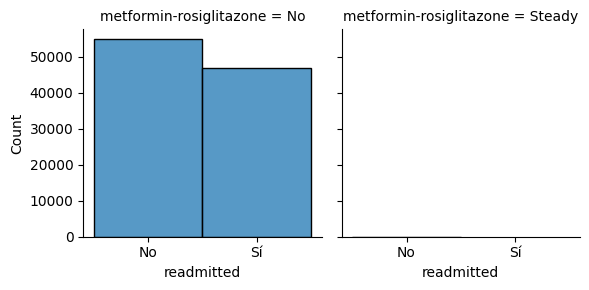

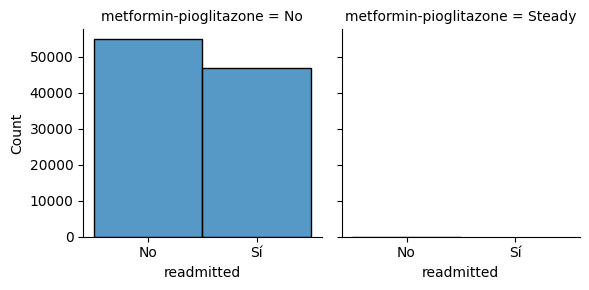

In [38]:
for columnName in df.iloc[:, 21:44].columns:
    g = sns.FacetGrid(df, col=columnName)
    g.map(sns.histplot, "readmitted")
#     plt.title(str(columnName) + 'vs Readmission', size = 13)
    plt.show()

In all of the features, Majority of the population is labeled as No. Means patients are not perscribed to take these medicines.

+ Insulin : En el caso de la insulina, la mitad de la población la toma.

+ metformin : En el caso de la metformina, se prescribe a casi 18000 pacientes.

+ examide & citoglipton : A nadie se le prescribe Examida, todos los valores son "No". Por lo tanto, eliminaremos estas columnas.

+ glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone : Estos medicamentos se prescriben a muy pocas personas.

+ glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone : Estos solo se asignan a 1 o 2 pacientes, lo que no agregará ningún valor a los datos. Por lo tanto, eliminaremos estas columnas.

+ troglitazone & tolazamide: Estos solo se asignan a muy pocas personas y no agregarán valor a los datos. También lo eliminaremos.

+ miglitol: también se prescribe a solo 40 pacientes, pero a todos los que se les prescribe se les readmite. Puede agregar algo de valor. Mantendremos esta característica.

+ acarbose : se asigna a 309 pacientes y la mayoría de ellos se readmite. Mantendremos esta característica.

+ pioglitazone & rosiglitazone: se asignan a entre 6 y 7 mil pacientes y la mayoría de ellos se readmite. Por lo tanto, mantendremos esta característica.

+ tolbutamide: este medicamento solo se prescribe a 24 personas. Esto tampoco agregará ningún valor específico.

+ glipizide & glyburide: estos medicamentos se asignan a entre 10 y 12 mil pacientes. Esto agregará algo de variación.

+ acetohexamide: este medicamento se asigna a solo 1 Encuentro. También lo eliminaremos.

+ glimepiride: este medicamento se prescribe a casi 5000 pacientes. Por lo tanto, mantendremos esta característica.

+ chlorpropamide este medicamento se prescribe a solo 87 pacientes. No aportará mucho valor, pero lo mantendremos porque la mayoría de las personas que lo toman vuelven a ingresar al hospital.

+ nateglinide: este medicamento se prescribe a 704 pacientes, pero la mayoría de los pacientes no vuelven a ingresar al hospital.

+ repaglinide: este medicamento se prescribe a casi 1500 pacientes, y el 50 por ciento de ellos vuelven a ingresar al hospital y el resto no.

+ metformin: este medicamento parece tener una relación importante y se ha prescrito a cerca de 20000 pacientes, de los cuales casi 9000 han vuelto a ingresar al hospital.

#### Eliminación de columnas con casi ninguna información

In [39]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [40]:
df.shape

(101763, 37)

#### Eliminamos los codigos de diagnósticos con valores vacíos

Como hemos encontrado valores nulos en los datos, los códigos de diagnóstico no están disponibles en las aproximadamente 1500 filas.
Por lo tanto, eliminaremos estas filas.

In [41]:
df = df[~((df['diag_1'] == "?") | (df['diag_2'] == "?") | (df['diag_3'] == "?"))]

In [42]:
df['readmitted'].value_counts()

No    53818
Sí    46423
Name: readmitted, dtype: int64

In [43]:
df = df.drop(columns= ['encounter_id', 'patient_nbr'])
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x =='Sí' else 0)

In [44]:
df.shape

(100241, 35)

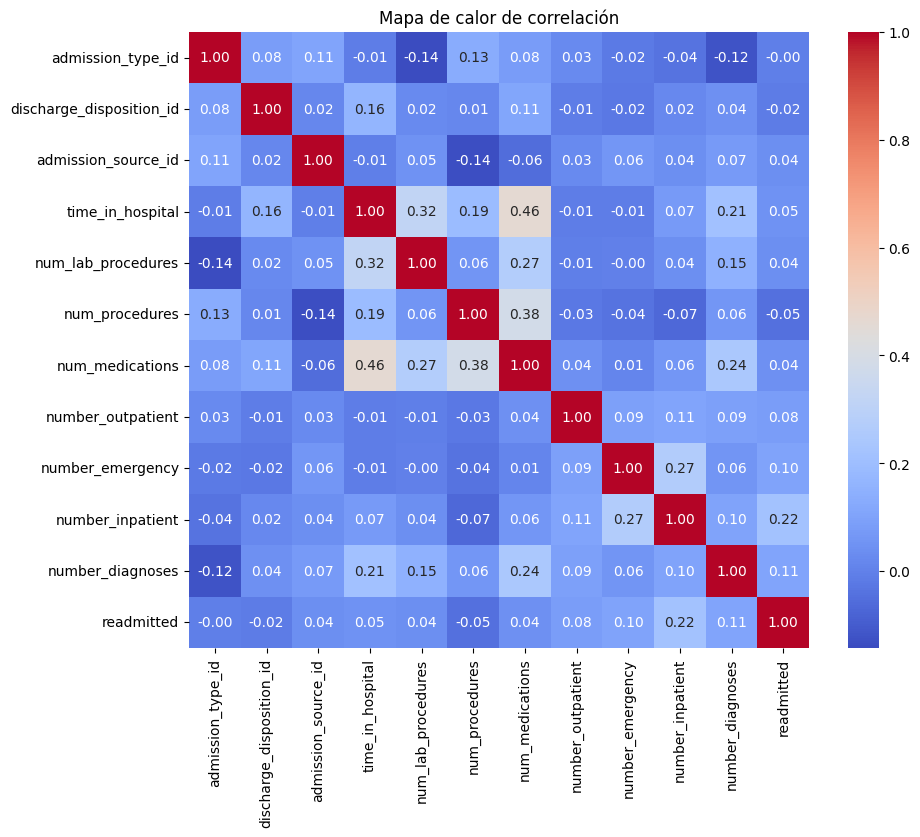

In [45]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de calor de correlación")
plt.show()

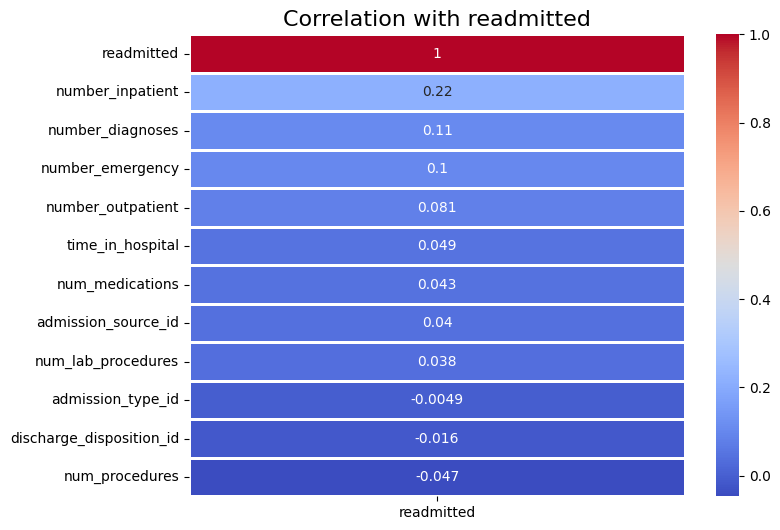

In [46]:
correlation = df.corr()['readmitted'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=2, linecolor='white')

plt.title('Correlation with readmitted', fontsize=16)

plt.show()

In [47]:
categorical_features =['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'] 

for i in categorical_features:
    df[i] = le.fit_transform(df[i])

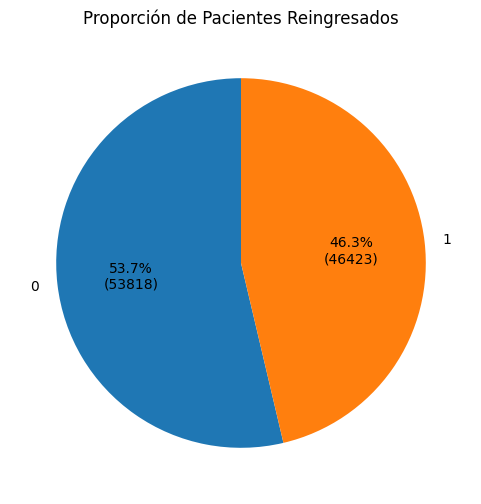

In [48]:
sizes = df['readmitted'].value_counts()
labels = sizes.index

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90
)
plt.title('Proporción de Pacientes Reingresados')
plt.show()

In [49]:
df.shape

(100241, 35)